# Numpy与数组操作

In [25]:
#导包
import numpy as np

## 2.1数组形状变换函数
详细讲解shape、reshape函数、resize函数

In [26]:
# np.reshape(a,newshape,order='C')

# a:ndarray,类似数组的对象
# newshape:int|int元组|列表 ,指定数组变换后的shape
# C:指定排列顺序,有'C','F','A'

# 返回：形状变换后的ndarray

a=np.arange(12)
b=np.reshape(a,(3,4))
print(b)

# 共享内存
print(f"a,b may_share_memory?:{np.may_share_memory(a,b)}")
print('\n')
c=np.arange(12)
d=np.reshape(a,(3,4),order='C') #行主序
print(f"C:{d}")
d=np.reshape(a,(3,4),order='F') #列主序
print(f"F:{d}")


# 注：变形前后元素数量不一致，会导致ValueError异常。
# 如果指定-1，函数就会根据原有数组的元素数量自动设置适当的形变值
e=np.arange(12)
f=np.reshape(e,(2,-1))
print(f"2行:{f}")
f=np.reshape(e,(-1,4))
print(f"4列:{f}")


#链式用法|ndarray.reshape
g=np.arange(12).reshape((3,4))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
a,b may_share_memory?:True


C:[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
F:[[ 0  3  6  9]
 [ 1  4  7 10]
 [ 2  5  8 11]]
2行:[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
4列:[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [27]:
# np.resize(a,newshape)

# a:类似数组的对象
# newshape:int|int元组

# 返回经过形变的ndarray

# 相对于reshape:1、缺少order参数  2、形变前后元素数量不一致，并不会报错，并强制执行

a=np.arange(12)
b=np.resize(a,(3,5))
print(f"b>12:{b}")
b=np.resize(a,(3,2))
print(f"b<12:{b}")

#不共享内存
print(f"a,b may_share_memory?:{np.may_share_memory(a,b)}")


# ndarray.resize
# ndarray.resize(newshape,refcheck=True)
# refcheck：是否检测前后元素数量一致
c=np.arange(12).resize((3,2))

b>12:[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11  0  1  2]]
b<12:[[0 1]
 [2 3]
 [4 5]]
a,b may_share_memory?:False


np.reshape/np.resize区别：
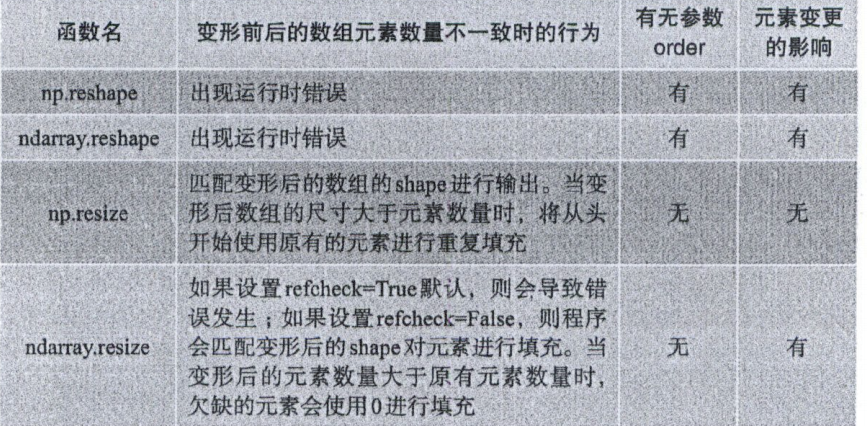

## 2.2 添加元素到数组末尾的函数
append


In [28]:
# np.append(arr,values,axis=None)

# arr:数组的对象
# values:数组的对象
# axis:int,不指定，生成的都是一维数组

# 返回添加元素后的ndarray

a=np.arange(12)
b=np.copy(a).reshape((3,4))
print(f"append:{np.append(b,[1,2,3,4])}")
# 维度要一直
print(f"append_0:{np.append(b,[[1,2,3,4]],0)}")
print(f"append:{np.append(b,[[1],[2],[3]],1)}")

append:[ 0  1  2  3  4  5  6  7  8  9 10 11  1  2  3  4]
append_0:[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [ 1  2  3  4]]
append:[[ 0  1  2  3  1]
 [ 4  5  6  7  2]
 [ 8  9 10 11  3]]


##  2.3 数组的真假值判断函数
np.all：在元素全部为True的情况下返回True

np.any：某个元素为True就返回True。

all和any使用方法完全相同，只是结果不同。也有ndarray.any方式。

In [7]:
# np.all(a,axis=None,out=None,keepdims=False)

# a:类似数组的对象，用于指定输入的数组
# axis: None,int|int元组，用于指定从哪个坐标轴方向上对元素进行访问
# out：ndarray ,用于指定保存结果的数组（可以省略）
# keepdims:bool ，用于指定输出结果时，对于元素数量为1的维度是否也原样保留。

# 返回：bool值


# ·示例
import numpy as np
a = np.array([
    [1,1,1],
    [1,0,0],
    [1,0,1]
])
b = np.ones((3,3))

print(f"np.all(a):{np.all(a)}")
print(f"np.all(a<2):{np.all(a<2)}")
print(f"np.all(b%3<2):{np.all(b%3<2)}")
print(f"np.all(a,axis=0):{np.all(a,axis=0)}")
print(f"np.all(a,axis=1):{np.all(a,axis=1)}")
print(f"np.all(a,axis=0,keepdims=True):{np.all(a,axis=0,keepdims=True)}")

# ·np.ndarray.all访问方式
print(f"a.all():{a.all()}")
print(f"b.all():{b.all()}")
print(f"a.all(axis=0):{a.all(axis=0)}")


# np.any参考all

np.all(a):False
np.all(a<2):True
np.all(b%3<2):True
np.all(a,axis=0):[ True False False]
np.all(a,axis=1):[ True False False]
np.all(a,axis=0,keepdims=True):[[ True False False]]
a.all():False
b.all():True
a.all(axis=0):[ True False False]


## 2.4 指定条件获取元素索引的函数
np.where指定条件表达式，获取目标元素的索引。

In [14]:
# np.where(condition[,x,y])

# condition:类似数组的对象|bool，用于指定条件或bool值
# x,y:类似数组的对象，对于condition指定的条件或bool值，如果指定True,返回x；
#     如果指定False则返回y。x、y的shape与原有的数组自动对其（指定时需要对x,y同时指定）

# 返回所提取的ndarray元素的索引。
# 如果原有的ndarray为二维数组则返回两个按照每个维度保存了索引值的—维数组

# ·条件的指定
a= np.arange(20,0,-2)
np.where(a<10)
print(f"np.where(a<10):{np.where(a<1)}")
a[np.where(a<10)]
print(f"a[np.where(a<10)]:{a[np.where(a<10)]}")

print("\n")
# ·多维数组返回的结果
a=np.arange(12).reshape((3,4))
print(f"np.where(a%2==0):{np.where(a%2==0)}")
print("\n")
# ·当做三元运算符
#  第一个参数对需要提取的元素的条件进行指定，第二个及之后的参数，对满足条件的值和不满足
#  条件的值进行指定。
print(f"np.where(a%2==0,'even','odd'):{np.where(a%2==0,'even','odd')}")
print("\n")
#  如果指定的值为可迭代对象(数组|元组)，会通过迭代得到的值进行替换
b=np.arange(12).reshape((3,4))
c=b**2
print(f"c:{c}")

print(f"np.where(b%%2==0,b,c):\n{np.where(b%2==0,b,c)}") #b中的奇数替代成c中的值
print(f"np.where(b%%2==0,b,(11,22,33,44)):\n{np.where(b%2==0,b,(11,22,33,44))}") #b中的奇数替代成c中的值

np.where(a<10):(array([], dtype=int64),)
a[np.where(a<10)]:[8 6 4 2]


np.where(a%2==0):(array([0, 0, 1, 1, 2, 2], dtype=int64), array([0, 2, 0, 2, 0, 2], dtype=int64))


np.where(a%2==0,'even','odd'):[['even' 'odd' 'even' 'odd']
 ['even' 'odd' 'even' 'odd']
 ['even' 'odd' 'even' 'odd']]


c:[[  0   1   4   9]
 [ 16  25  36  49]
 [ 64  81 100 121]]
np.where(b%%2==0,b,c):
[[  0   1   2   9]
 [  4  25   6  49]
 [  8  81  10 121]]
np.where(b%%2==0,b,(11,22,33,44)):
[[ 0 22  2 44]
 [ 4 22  6 44]
 [ 8 22 10 44]]


## 2.5 最大值、最小值的筛选函数
np.amax|ndarray.max方法
np.amin|ndarray.min方法
使用方法完全相同

In [25]:
# np.amax(a,axis=None,out=None,keepdims=np.NoValue)

# a:数组对象，指定输入数组
# axis:int,指定需要求取最大值的坐标轴方向。
# out:数组对象，（可省略）指定保持返回值的数组
# keepdims:bool,(可省略)指定True,将保留和原有数组相同的维度

# 返回最大值，如果指定坐标轴将返回最大值的数组

#·示例
import numpy as np
np.amax(np.array([1,2,3,2,1]))
arr=np.array([1,2,3,4]).reshape((2,2,))
np.amax(arr,axis=0)
np.amax(arr,keepdims=True)

#·ndarray.max/min(axis,out,keepdims)
a=np.random.rand(20).reshape((2,2,5))
a.max()
a.max(axis=1)

# 注：只要有一个元素包含NaN属性，程序就会将NaN作为最大值返回；如果不将NaN作为
# 最大值返回，使用nanmax函数

b=np.arange(10,dtype=float)
b[3]=np.NaN
b.max()

# np.amin|ndarray.min使用相同

nan

## 2.6 返回数组中最大元素索引的函数
np.max返回最大值的元素

argmax返回最大值元素的索引

In [36]:
# np.ndarray.argmax(axis=None,out=None)

# axis:int,(可以省略)用于指定需要读取最大值的坐标轴方向
# out:数组对象，(可以省略)指定用于保存返回的索引值的数组

# 返回最大元素的索引。如果指定坐标轴，就会返回沿着该坐标轴上的最大值的索引

# np.argmax(a,axis=None,out=None)

# a：数组对象，输入数组；
# 其他一致

#·示例
import numpy as np
a=np.random.randint(10,size=10)
print(a)
print(f"np.argmax:{np.argmax(a)}")
print(f"a.argmax:{a.argmax()}")

#·多维数组：如果不指定axis,就会将多维数组与一维数组的处理一样，降维成一维数组，返回索引
b=np.random.randint(10,size=(3,4))
print(b)
print(f"np.argmax(b):{np.argmax(b)}")
print(f"np.argmax(b,axis=0):{np.argmax(b,axis=0)}")


# np.argmin|ndarray.argmin同上

[2 1 4 6 7 9 6 7 0 4]
np.argmax:5
a.argmax:5
[[3 3 8 2]
 [6 0 8 5]
 [9 1 4 7]]
np.argmax(b):8
np.argmax(b,axis=0):[2 0 0 2]


## 2.7切换数组坐标轴顺序的函数
np.ndarray,transpose | np.transpose | np.ndarray.T,通过3个函数实现

In [ ]:
# 1.np.ndarray.transpose(axes)

# axes:int元组|n个并列的int,(可省略)用于指定经过转置后的坐标轴的切换方法。不指定，则返回坐标轴顺序翻转后得到的数组。

#·多维数组：
# 数组将转换第1和2个轴，则axes=(0,2,1) ;轴的初始顺序为（0,1,2）
# 不指定axes,则顺序由(0,1,2)->(2,1,0)

# 2.np.transpose(a,axes=None)

# a:数组对象，需要转置的数组
# axes:int元组，(可以省略)指定坐标轴顺序

# 3.np.ndarray.T

# 默认顺序转换，不需要参数

## 2.8 排序函数

np.sort 返回值  | np.argsort返回索引值

np.ndarray.sort与np.sort区别：
·np.ndarray.sort对数组本身进行排列
·np.sort对数组的副本进行排列

In [43]:
# 1.np.sort(a,axis=1,kind='quicksort',order=None)

# a:数组对象，需要排列的数组
# axis:int|None，(可省略)指定排序方向，默认从低维开始
# kind:'quicksort'|'mergesort'|'heapsort',（可省略）默认快排
# order:string|string的列表，(可省略)如果a中指定的数组已经定义了字段，就用于指定是按照哪个字段对元素进行排序

#  返回经过升序排列的数组

# 2.np.argsort(a,axis=-1,kind='quicksort',order=None)

# a:数组对象，需要排列的数组
# axis:int|None,（可省略）指定需要进行排序的坐标轴方向，默认从低维进行
# kind:'quicksort'|'mergesort'|'heapsort',(可省略)指定排序算法
# order:string|string的列表，（可省略）按照指定字段对元素进行排序

# 返回沿着指定的坐标轴方向上完成排序后，元素在原有数组中的索引值


# ·order用法：
arr=[('Alices',10,9.7),('bob',12,9.3)]
dt=[('name','S10'),('ID',int),('score',float)]
a=np.array(arr,dtype=dt)
print(np.sort(a,order='score'))


# 3.np.ndarray.sort(axis=-1,kind='quicksort',order=None)

# axis:int|None,（可省略）指定需要进行排序的坐标轴方向，默认从低维进行
# kind:'quicksort'|'mergesort'|'heapsort',(可省略)指定排序算法
# order:string|string的列表，（可省略）按照指定字段对元素进行排序

# 无返回值

[(b'bob', 12, 9.3) (b'Alices', 10, 9.7)]


## 2.9数组拼接函数
在axis=0方向上对数组进行横向拼接的hstack函数

在axis=1方向上对数组进行纵向拼接的vstack函数

ndarray无+方式拼接

In [ ]:
# np.hstack(tup)

# tup：ndarray的元组，需要拼接的数组

# 返回经过拼接所得到的数组

# 注：hstack，如果只是axis=1的元素数量不同，是可以使用np.hstack函数实现拼接的.
# eg.(1,2,3),(1,4,3) 可以;(1,2,3),(2,2,3)不可以


# np.vstack(tup)

# tup:ndarray元组，需要拼接的数组

# 返回经过拼接所得到的数组

# 注：vstack，如果只是axis=0的元素数量不同，是可以使用np.hstack函数实现拼接的.


水平拼接保持行数不变，动列axis=1，垂直拼接保持列数不变，动行axis=0

##  2.10数据可视化
matplotlib与numpy兼容性非常好


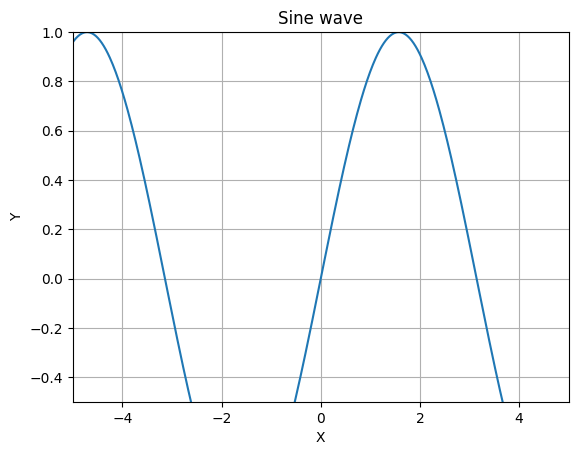

In [55]:
# 在Jupyter中显示matplotlib画面的语句
# %matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

#·正弦曲线
x=np.linspace(-10,10,1000)
y=np.sin(x)
plt.plot(x,y)
# plt.show()

#·轴标签和标题设置
plt.grid(True) #加入网格
plt.title('Sine wave') #加入标题
plt.xlabel('X') #x轴标签
plt.ylabel('Y') #y轴标签

#·修改坐标值范围
plt.xlim(-5,5)
plt.ylim(-0.5,1.0)

plt.show()

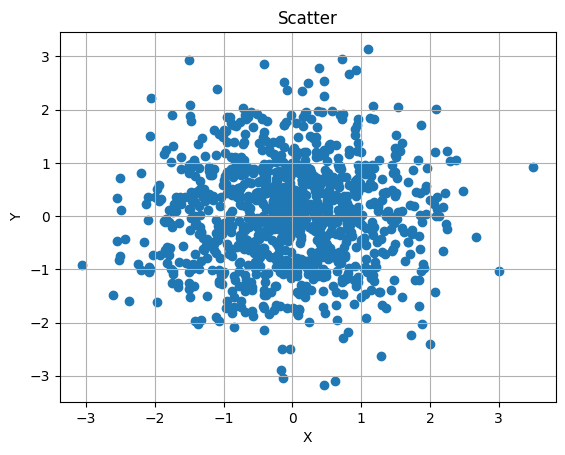

In [54]:
#·散点图
x=np.random.randn(1000)
y=np.random.randn(1000)
plt.scatter(x,y)
plt.title('Scatter')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

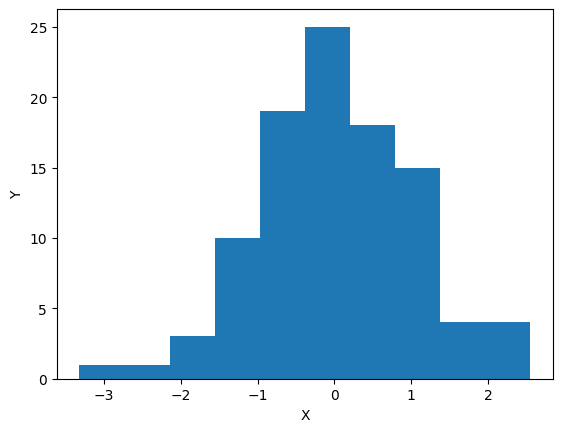

In [57]:
#·直方图
plt.hist(np.random.randn(100))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

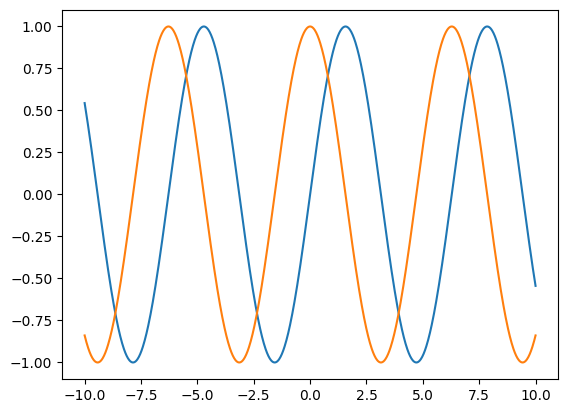

In [58]:
#·多个叠加正弦曲线
x=np.linspace(-10,10,1000)
y1=np.sin(x)
y2=np.cos(x)
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

## 2.11 生成数组
全0
全1
连续数组
单位举证

In [60]:
# 1.np.zeros(shape,dtype=float,order='C') ——全0矩阵

# shape:int|int元组，指定数组的形状
# dtype：数据类型，默认float
# order:'C'|'F',排序方式

# 返回指定shape,全0的数组。

# np.empty不能保证数组的每个元素的值都为0，但速度比zeros快

# 2.np.zeros_like(a,dtype=None,order='K',subok=True)

# order:'C'|'F'|'A'|'K'，默认'K'，继承原有数组的排列方式
# subok:bool,默认True，使用a的子类的数据类型生成ndarray对象

# 返回与a相同shape,且全0的ndarray对象

In [ ]:
# 1.np.ones(shape,dtype=None,order='C') ——全1矩阵
# 2.np_ones_like(a,dtype=None,order='K',subbok=True)

In [ ]:
# 1.np.arange([start,]stop,[step,]dtype=None) ——连续矩阵

# start,stop,step:int|float

# 2.np.linspace(start,stop,num=50,endpoint=True,retstep=False,dtype=None)

# start,stop:int|float
# num:int ,指定生成数组的元素数量
# endpoint:bool,是否将stop作为其中元素
# retstep:bool,是否在生成的数量后面显示公差（默认不显示）


In [ ]:
# 1.np.eye(N,M=None,k=0,dtype=float,order='C') ——单位矩阵

# N：int,指定生成的单位矩阵行数
# M：int,指定生成的单位矩阵列数
# k：int,对角线移动次数，k>0向上移动，k<0向下移动

# 2.np.identty(n,dtype=float)  ——方阵

# n:int,指定生成的矩阵尺寸


In [ ]:
# 初始化矩阵——快速对一个矩阵初始化

# np.empty(shape,dtype=float,order='C') 

# 返回指定形状并且没有经过初始化的数组对象。不需要数值进行初始化操作

In [65]:
# 随机数生成函数
# 1.np.random.random(size = None)  :接收元组,[0,1]
# 2.np.random.rand(d0, d1, …, dn) :接收分开的参数,[0,1]
# 3.np.random.randn(d0, d1, …, dn) :生成给定形状的正态分布随机样本数
# 4.np.random.randint(low, high=None, size=None, dtype=int):生成指定范围内随机整数，或随机整数数组。当 high = None 时，整数的取值范围是 [ 0 , l o w ) [0,low) [0,low) ，否则取值范围为 [ l o w , h i g h ) [low,high) [low,high)
# 5.np.random.uniform(low=0.0,high=1.0,size = None):从均匀分布中随机采样，区间为 [ l o w , h i g h ) [low,high) [low,high)。
# 6.np.random.exponential(scale = 1.0, size = None):指数分布
# 7.np.random.choice(a,size = None,replace = True, p =True):从给定的列表中随机提取
#  replace:是否重复提取
#  p:取值数的频率，合计为1
# 8.np.random.seed(seed = None)：设置随机数种子，使生成的随机数相同。
# 9.np.random.shuffle(x):将给定数列或数组打乱顺序重新排列，如果是数组，则只沿多维数组的第一个轴对数组进行重新排序。


np.random.rand():0.34677213720719935
np.random.rand(10):2
np.random.rand(2,3):[[0.58586059 0.76142337 0.5965715 ]
 [0.9756908  0.56080631 0.76196588]]
np.random.rand(10,size=(2,3)):[[7 6 2]
 [8 5 4]]
np.random.rand(1,5,size=10):[3 3 4 3 2 4 4 4 3 3]


In [ ]:
# 1.np.random.randn(d0,d1,..):正态分布
# 2.np.random.normal(loc,scale,size):指定loc平均值，scale标准差，size大小的正太分布
# 3.np.random.binomial(n,p,size):二项分布的随机数
# 4.np.random.beta(a,b,size):贝塔分布的随机数
# 5.np.random.gamma(shape,scale,size):伽马分布的随机数
# 6.np.random.poisson(k,size)：泊松分布的随机数
# 7.np.random.chisquare(a,size)：卡方分布的随机数

## 2.18 扁平化数组处理